# **1.0 Data Exploration and Visualization**

### **1.1 Import Libraries and Data Retrieval**

In [84]:
# Mount google drive to access files and folders in the drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [85]:
!pip install scikeras[tensorflow]

In [86]:
# Import Standard Python Libraries to expand the functionality of the code
import pandas as pd
import numpy as np

# Import Visualization Libraries
import matplotlib.pyplot as plt     # Draw basic graph
import seaborn as sns               # Create attractive and informative satistical graphics
import plotly.express as px
import plotly.graph_objects as go

# Import Imbalanced-learn Library to handle imbalanced data
from imblearn.over_sampling import SMOTE
from collections import Counter

# Import sklearn Libraries
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import  RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer

# Import TensorFlow Libraries
import tensorflow as tf
from tensorflow import keras
from keras.initializers import HeNormal
from keras.losses import BinaryCrossentropy
from keras.metrics import AUC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

In [87]:
# Load a csv file into a DataFrame object
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset of Customer Satisfaction Level on E-commerce Platform.csv')

# View the DataFrame object
df

,Gender,Age,State,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,Female,NaN,KL,Gold,1130.61,15.0,4.5,True,26.0,Satisfied
1,Male,31.0,Pahang,Silver,783.19,11.0,4.2,False,21.0,Unsatisfied
2,Male,32.0,Penang,Silver,800.89,NaN,4.1,False,17.0,Unsatisfied
3,Male,33.0,Perak,Silver,680.30,10.0,3.8,True,32.0,Unsatisfied
4,Female,34.0,Terengganu,Bronze,420.80,7.0,3.1,False,21.0,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...
7694,Male,28.0,Perak,Gold,1490.14,21.0,4.9,False,9.0,Satisfied
7695,Female,41.0,Perlis,Bronze,485.24,9.0,3.6,True,39.0,Unsatisfied
7696,Male,27.0,Perak,Silver,710.41,13.0,4.1,True,58.0,Unsatisfied
7697,Male,26.0,Sabah,Silver,690.58,12.0,3.9,True,47.0,Unsatisfied


### **1.2 Data Shape, Data Information and Summary Statistics**

In [88]:
# Display the total number of records (rows, columns)
df.shape

(7699, 10)

In [89]:
# Display the basic informaion about the Customer Satisfaction Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7699 entries, 0 to 7698
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    7412 non-null   object 
 1   Age                       7489 non-null   float64
 2   State                     7574 non-null   object 
 3   Membership Type           7428 non-null   object 
 4   Total Spend               7512 non-null   float64
 5   Items Purchased           7414 non-null   float64
 6   Average Rating            7438 non-null   float64
 7   Discount Applied          7460 non-null   object 
 8   Days Since Last Purchase  7452 non-null   float64
 9   Satisfaction Level        7420 non-null   object 
dtypes: float64(5), object(5)
memory usage: 601.6+ KB


In [90]:
# Generate Summary Statistics for both categorical and numberical columns
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,7412,4,Female,3747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,7489.0,NaN,NaN,NaN,34.214848,6.857303,20.0,30.0,34.0,39.0,122.0
State,7574,17,Kelantan,510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Membership Type,7428,3,Silver,2529,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Spend,7512.0,NaN,NaN,NaN,885.291428,464.663316,10.09,505.74,780.9,1180.79,8452.654333
Items Purchased,7414.0,NaN,NaN,NaN,13.153493,7.812014,7.0,10.0,12.0,16.0,388.0
Average Rating,7438.0,NaN,NaN,NaN,4.09495,0.670268,2.59792,3.5,4.1,4.6,9.52487
Discount Applied,7460,2,True,3781,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Days Since Last Purchase,7452.0,NaN,NaN,NaN,28.066694,16.053569,9.0,15.0,24.0,39.0,335.0
Satisfaction Level,7420,2,Unsatisfied,4781,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **1.3 Correlation Analysis**

In [91]:
# Create a dictionary with the correlation strength and type for reference
corr_dict = {
    "Correlation Coefficient": [-0.7, -0.5, -0.3, 0, 0.3, 0.5, 0.7],
    "Correlation Strength": ["Very strong", "Strong", "Weak", "None", "Weak", "Strong", "Very strong"],
    "Correlation Type": ["Negative", "Negative", "Negative", "Zero", "Positive", "Positive", "Positive"]
}

# Convert the dictionary to a DataFrame for easy reading
corr_table = pd.DataFrame(corr_dict)

# Display the DataFrame as Table
corr_table

,Correlation Coefficient,Correlation Strength,Correlation Type
0,-0.7,Very strong,Negative
1,-0.5,Strong,Negative
2,-0.3,Weak,Negative
3,0.0,None,Zero
4,0.3,Weak,Positive
5,0.5,Strong,Positive
6,0.7,Very strong,Positive


In [92]:
# Measure the correlation between all the numerical column in table format
df.select_dtypes(include = ["float64", "int64"]).corr()

,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
Age,1.000000,-0.122987,-0.084540,-0.160151,0.195959
Total Spend,-0.122987,1.000000,0.487867,0.787977,-0.146361
Items Purchased,-0.084540,0.487867,1.000000,0.542678,-0.050151
Average Rating,-0.160151,0.787977,0.542678,1.000000,-0.102297
Days Since Last Purchase,0.195959,-0.146361,-0.050151,-0.102297,1.000000


Text(0.5, 1.0, 'Correlation Analysis of Numerical Columns')

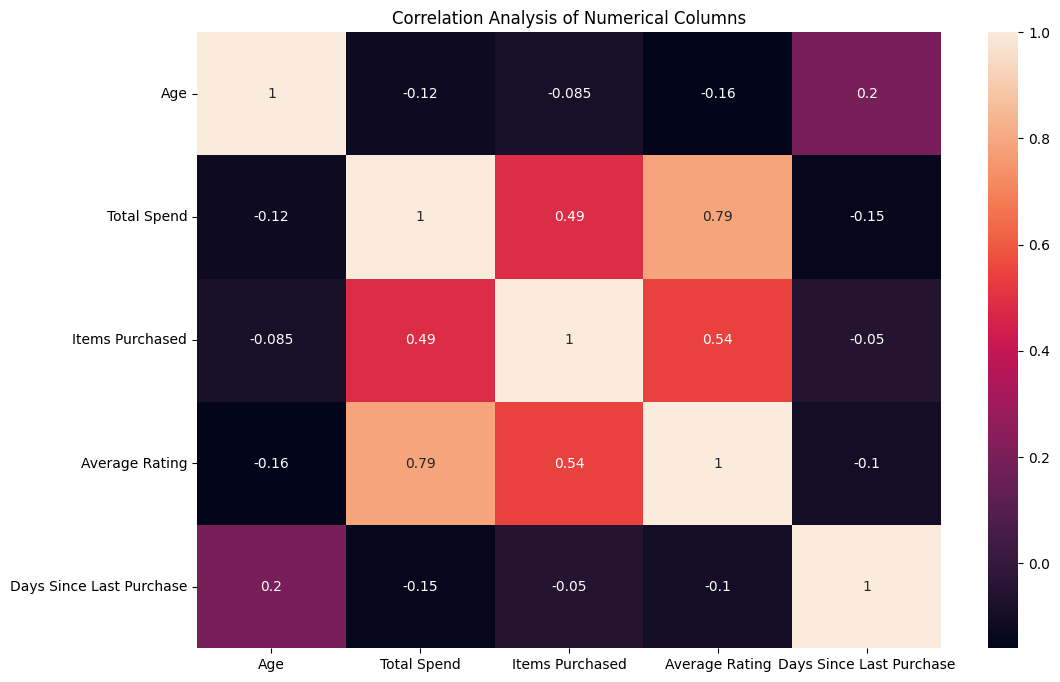

In [93]:
# Extract the numerical columns
num_cols = df.select_dtypes(include = ["float64", "int64"])

# Set Heat Map to be displayed in a fixed size
plt.figure(figsize = (12, 8))

# Display Heat Map with all the numerical columns as an illustration
sns.heatmap(num_cols.corr(), annot = True)

# Add title for the Heat Map
plt.title("Correlation Analysis of Numerical Columns")

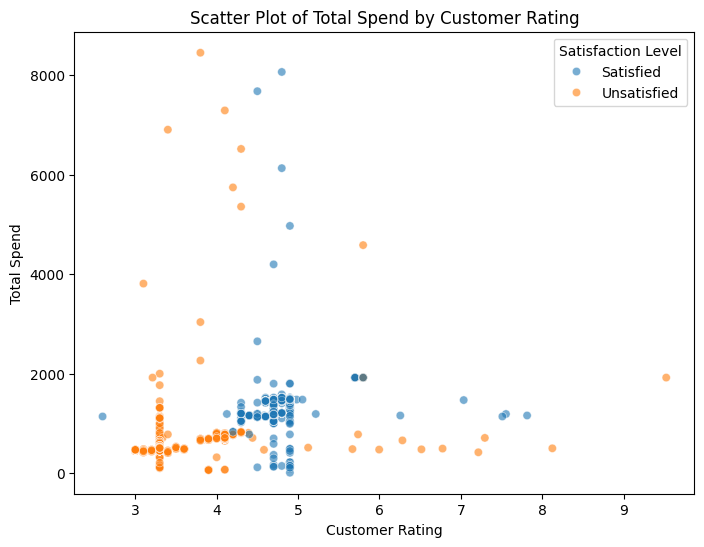

In [94]:
# Set the figure size
plt.figure(figsize = (8, 6))

# Generate a Scatter Plot of Total Spend by Customer Rating
sns.scatterplot(data = df, x = "Average Rating", y = "Total Spend", hue = "Satisfaction Level", alpha = 0.6)

# Add labels and title to the scatter plot
plt.title("Scatter Plot of Total Spend by Customer Rating")
plt.xlabel("Customer Rating")
plt.ylabel("Total Spend")
plt.legend(title = "Satisfaction Level")
plt.show()

In [95]:
# Calculate average number of days since last purchase by satisfaction level
avg_days_by_satisfaction = df.groupby('Satisfaction Level')['Days Since Last Purchase'].mean().sort_values(ascending = False)

# Display the average number of days since last purchase by satisfaction level as a table
avg_days_by_satisfaction

,Days Since Last Purchase
Satisfaction Level,
Unsatisfied,32.641518
Satisfied,19.878143


Text(0.5, 1.0, 'Average Number of Days Since Last Purchased by Satisfaction Level')

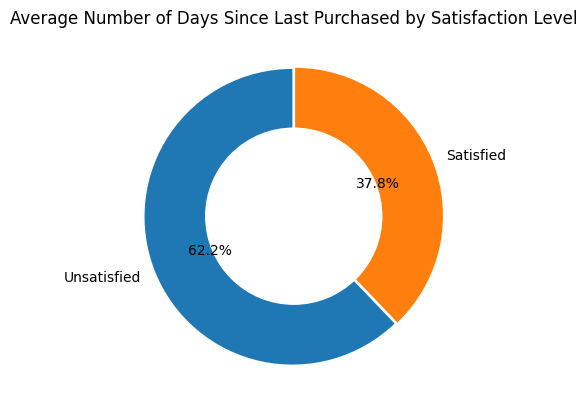

In [96]:
# Add a break between the different Satisfaction Level
explode = (0.01, 0.01)

# Generate the donut chart of Average Number of Days Since Last Purchase by Satisfaction Level
avg_days_by_satisfaction.plot(kind = 'pie', autopct='%1.1f%%',
                               explode=explode, ylabel = ' ',
                               startangle = 90)

# Add a circle at the center to transform it into a donut chart
center_circle = plt.Circle((0, 0), 0.60, fc='white')
plt.gcf().gca().add_artist(center_circle)

# Add labels and title on the Donut Chart
plt.title('Average Number of Days Since Last Purchased by Satisfaction Level')

<Figure size 800x600 with 0 Axes>

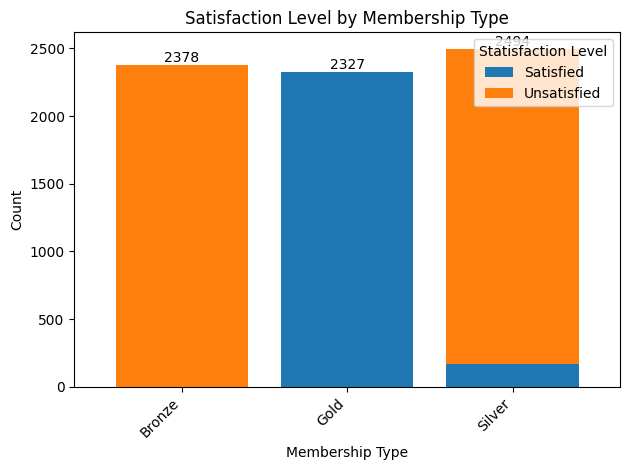

In [97]:
# Stacked bar chart of satisfaction level by membership type
plt.figure(figsize = (8, 6))

# Prepare data for the stacked bar chart
membership_counts = df.groupby(["Membership Type", "Satisfaction Level"]).size().unstack(fill_value = 0)

# Calculate the total counts for each membership type and sort
membership_counts.loc[membership_counts.sum(axis = 1).sort_values().index]

# Plot the stacked bar chart
ax = membership_counts.plot(kind = "bar", stacked = True, width = 0.8)

# Calculate and label the total value for each bar
for bar in ax.containers:
    # Sum up the heights of the stacked segments in each bar
    totals = [sum(segment.get_height() for segment in stack) for stack in zip(*ax.containers)]

# Place the total value labels above each bar
for i, total in enumerate(totals):
    ax.text(i, total, str(int(total)), ha='center', va='bottom', fontsize=10)

# Add labels and title for the stacked bar chart
plt.title("Satisfaction Level by Membership Type")
plt.xlabel("Membership Type")
plt.ylabel("Count")
plt.xticks(rotation = 45, ha = "right")
plt.legend(title = "Statisfaction Level")
plt.tight_layout()
plt.show()

### **1.4 Distribution Analysis**

In [98]:
# Ungrouped Frequency Distribution for Satisfaction Level
satisfaction_freq = df["Satisfaction Level"].value_counts()

# Display the Frequency Distribution for Satisfaction Level in Table
satisfaction_freq

,count
Satisfaction Level,
Unsatisfied,4781
Satisfied,2639


Text(0.5, 1.0, 'Frequency Distribution of Satisfaction Level')

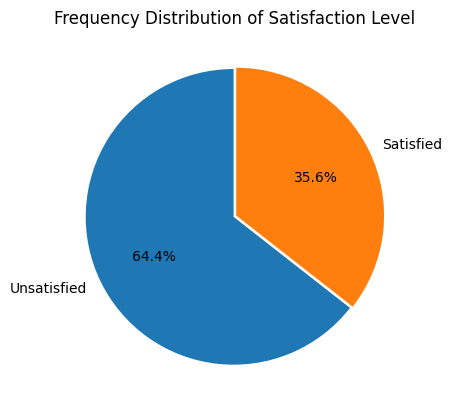

In [99]:
# Add labels for Frequency Distribution
labels = ["Unsatisfied", "Satisfied"]
explode = [0.01, 0.01]

# Display the Frequency Distribution of Satisfaction Level in Pie Chart
plt.pie(df["Satisfaction Level"].value_counts(), explode = explode,
        labels = labels, autopct = "%1.1f%%", startangle = 90)

# Add title for the Pie Chart
plt.title("Frequency Distribution of Satisfaction Level")

In [100]:
# Grouped Frequency Distribution Table for Customer Rating
# 1. Generate 10 equal-width bins
df["rating_bins"] = pd.cut(df["Average Rating"], bins = 10)

# 2. Count the total number of customers rate the platform within the range
rating_bins_count = df["rating_bins"].value_counts()

# 3. Display the frequency distribution of customer rating in table
rating_bins_count

,count
rating_bins,
"(3.983, 4.676]",2718
"(3.291, 3.983]",2249
"(4.676, 5.369]",1456
"(2.591, 3.291]",755
"(5.369, 6.061]",247
"(6.754, 7.447]",5
"(7.447, 8.139]",4
"(6.061, 6.754]",3
"(8.832, 9.525]",1


Text(0.5, 1.0, 'Frequency Distribution of Customer Rating')

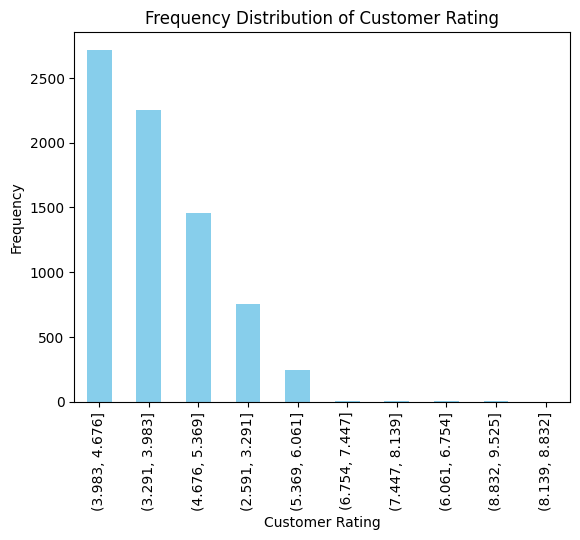

In [101]:
# Display the frequency distribution of customer rating in bar chart using the rating_bins
rating_bins_count.plot(kind = "bar", color = "skyblue")

# Add labels and title on the bar chart
plt.xlabel("Customer Rating")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Customer Rating")

Text(0.5, 1.0, 'Frequency Distribution of Customer Rating')

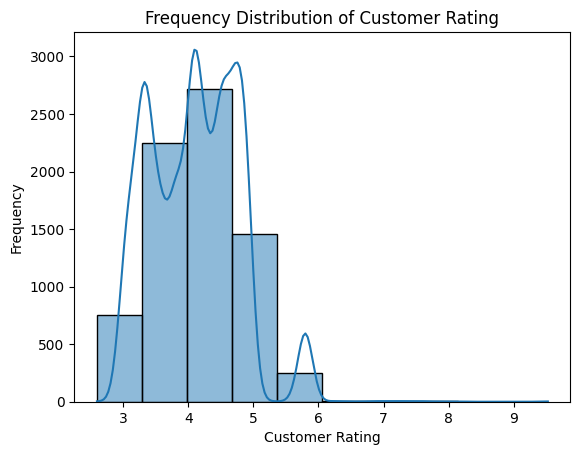

In [102]:
# Drop the unused column
df.drop(columns = "rating_bins", inplace = True)

# Display the frequency distribution of customer rating in histogram
sns.histplot(df["Average Rating"], bins = 10, kde = True, edgecolor = "black")

# Add labels and title on the histogram
plt.xlabel("Customer Rating")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Customer Rating")

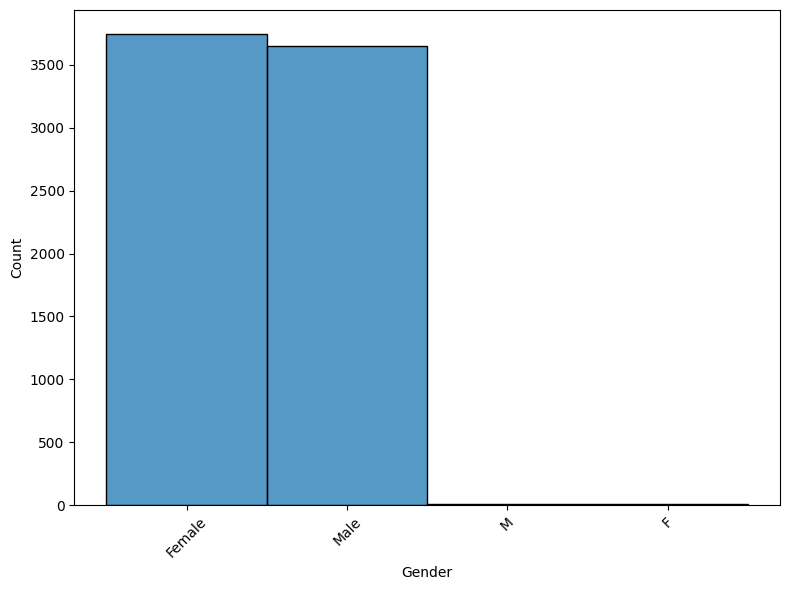

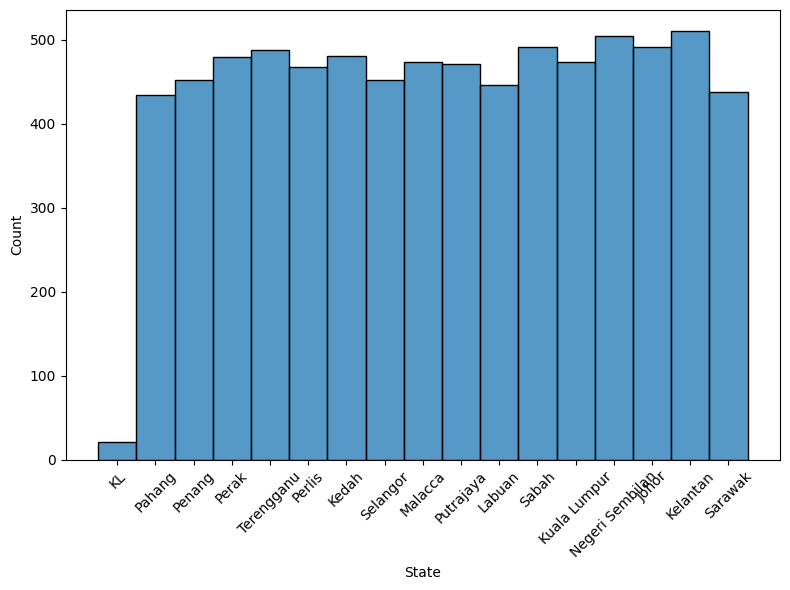

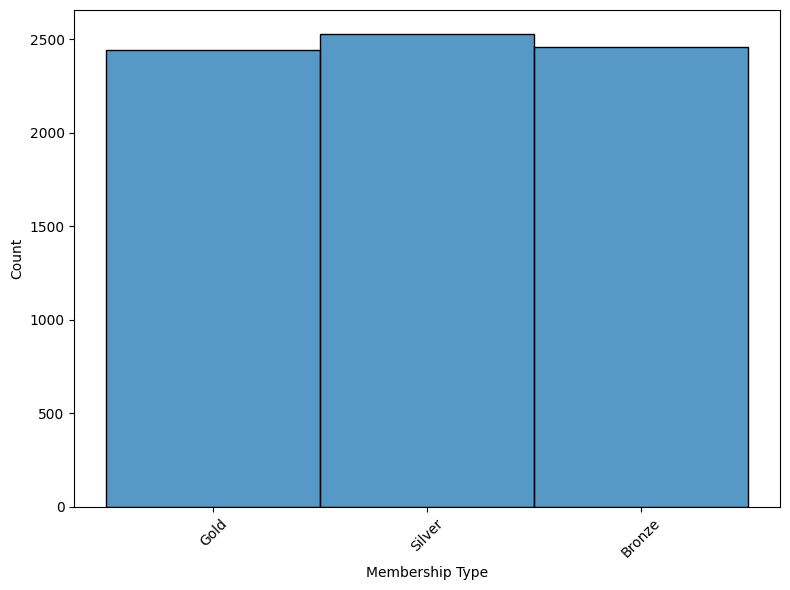

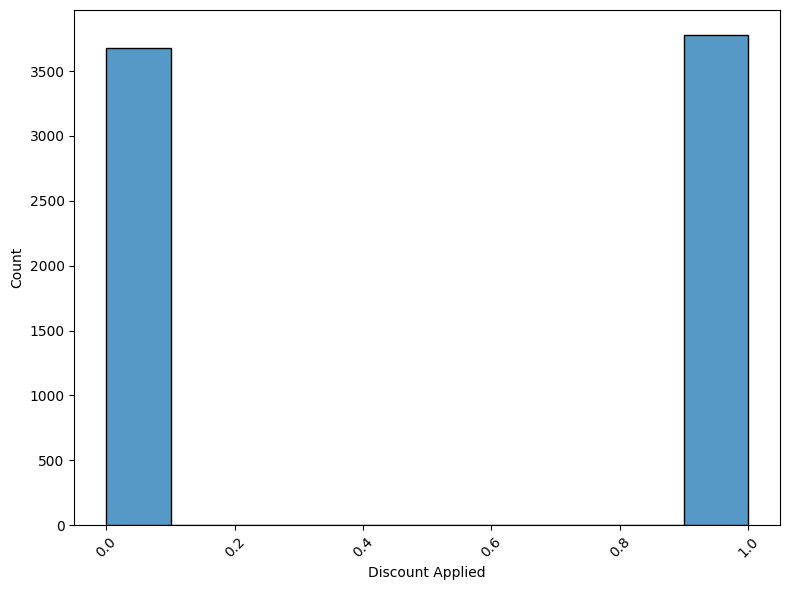

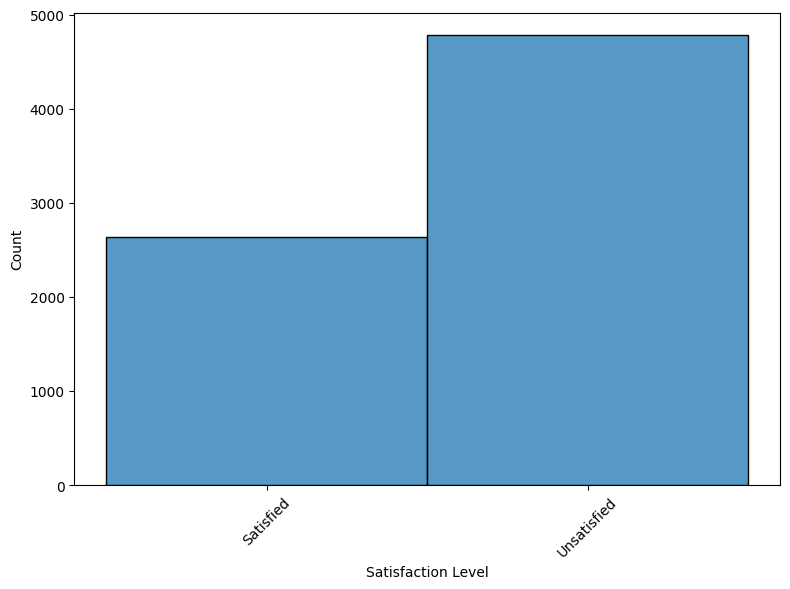

In [103]:
# Extract the categorical columns
dist_cat = df.select_dtypes(include = "object").columns

# Visualize each categorical columns with distribution charts
for i in dist_cat:
  # Set the figure size
  plt.figure(figsize = (8, 6))

  # Generate the histogram
  sns.histplot(df[i], bins = 10)

  # Set the angle of the labels on x-axis
  plt.xticks(rotation = 45)

  # Set the distance between the bars
  plt.tight_layout()
  plt.show()

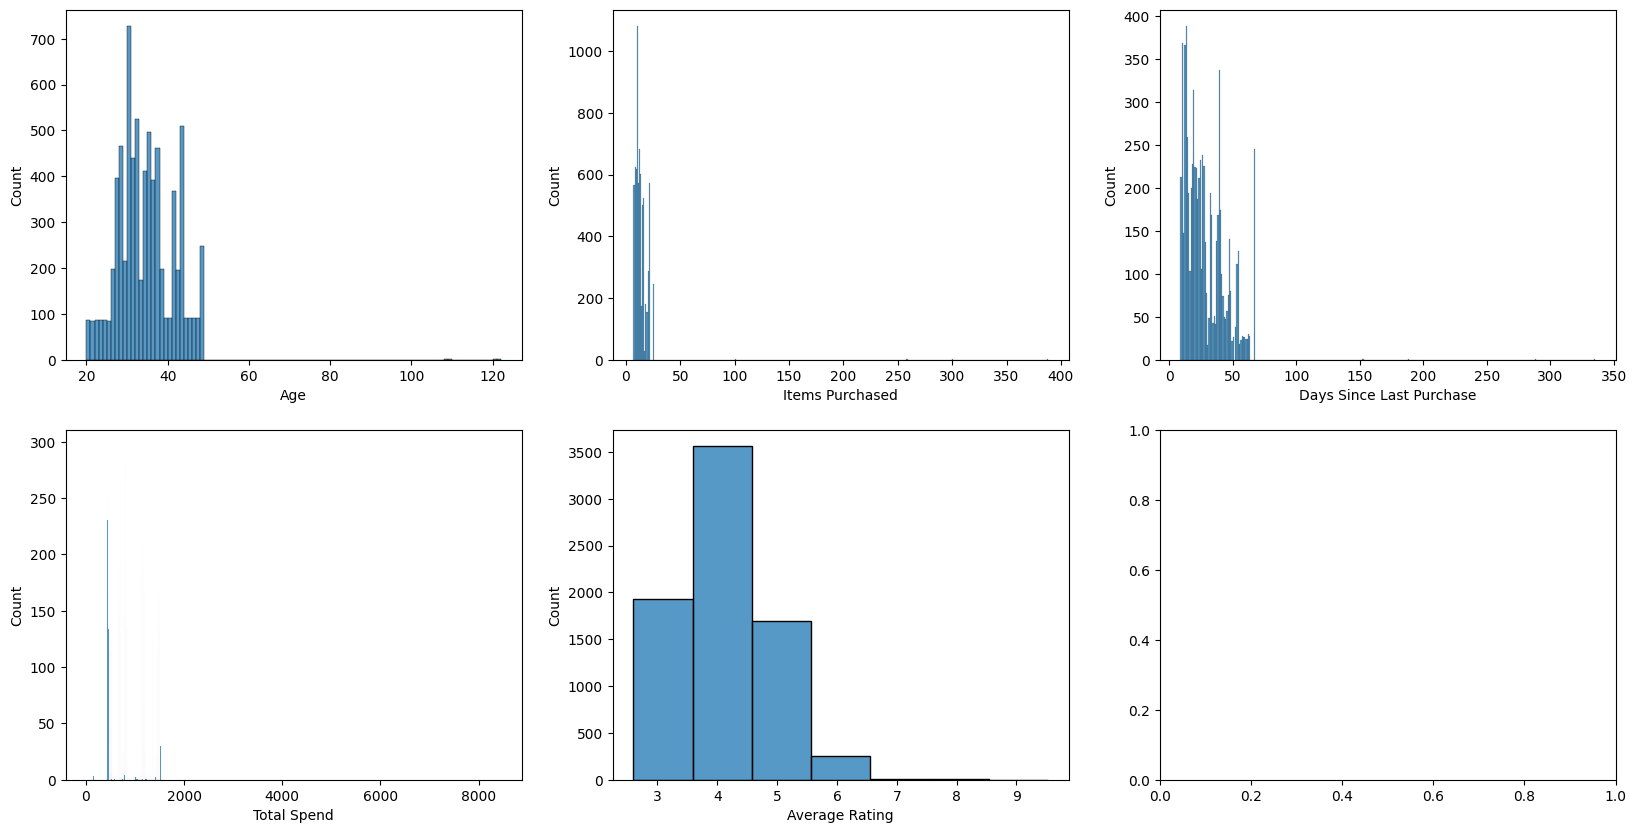

In [104]:
# Visualize numerical columns with distribution charts
# 1. Select only numerical columns (exclude target column)
num_cols = df.select_dtypes(include = ["float64", "int64"]).columns

# 2. Set the number and size of the distribution charts
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize = (20, 10))

# 3. Initialize subplot position
x_axis = 0
y_axis = 0

# 4. Loop subplots to generate distribution charts
for i in num_cols:
  sns.histplot(df[i], binwidth = 1, ax = ax[x_axis, y_axis])
  x_axis += 1         # Move to the right
  if x_axis == 2:     # Move below
    x_axis = 0
    y_axis += 1

# **2.0 Data Preprocessing**

### **2.1 Handling Missing Values**

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'Gender'),
  Text(1.5, 0, 'Age'),
  Text(2.5, 0, 'State'),
  Text(3.5, 0, 'Membership Type'),
  Text(4.5, 0, 'Total Spend'),
  Text(5.5, 0, 'Items Purchased'),
  Text(6.5, 0, 'Average Rating'),
  Text(7.5, 0, 'Discount Applied'),
  Text(8.5, 0, 'Days Since Last Purchase'),
  Text(9.5, 0, 'Satisfaction Level')])

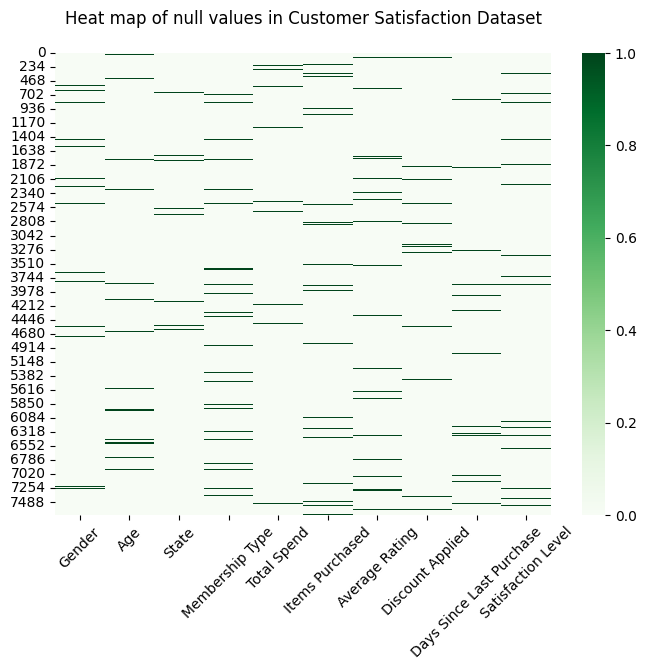

In [105]:
# Set the figure size
plt.figure(figsize = (8, 6))

# Generate a heat map to identify null values in every column
sns.heatmap(df.isna(), cmap = "Greens")

# Add title for the figure
plt.title("Heat map of null values in Customer Satisfaction Dataset\n")

# Set the angle of the labels on x-axis
plt.xticks(rotation = 45)

In [106]:
# Identify rows with null values
null_rows = df[df.isnull().any(axis = 1)]

# List down the rows with null values
null_rows

,Gender,Age,State,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,Female,NaN,KL,Gold,1130.61,15.0,4.5,True,26.0,Satisfied
2,Male,32.0,Penang,Silver,800.89,NaN,4.1,False,17.0,Unsatisfied
7,Female,NaN,Kedah,Gold,1130.61,15.0,4.5,True,26.0,Satisfied
11,NaN,40.0,Putrajaya,NaN,1500.09,21.0,4.9,NaN,10.0,Satisfied
13,NaN,42.0,Putrajaya,Silver,790.21,11.0,NaN,False,15.0,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...
7686,Female,30.0,Labuan,Gold,1190.81,16.0,4.5,NaN,20.0,Satisfied
7688,Female,NaN,Kelantan,Gold,1180.80,16.0,4.7,True,19.0,Satisfied
7691,Female,31.0,Malacca,Gold,1130.60,NaN,4.5,True,26.0,Satisfied
7692,Male,28.0,Johor,Gold,819.10,21.0,NaN,False,9.0,Satisfied


In [107]:
# Identify the total null values in each column
df.isnull().sum()

,0
Gender,287
Age,210
State,125
Membership Type,271
Total Spend,187
Items Purchased,285
Average Rating,261
Discount Applied,239
Days Since Last Purchase,247
Satisfaction Level,279


In [108]:
# If the numerical columns have null values, fill with the median
num_cols = df.select_dtypes(include = ["float64", "int64"])

# Repeat for each rows that contain null values
for i in num_cols:
  median = df[i].median()           # Compute the median value of a column
  df[i] = df[i].fillna(median)      # Replace the null value with median

In [109]:
# Set no silent downcasting to True to opt-in to the future behavior
pd.set_option("future.no_silent_downcasting", True)

# If the categorical columns have null values, fill with the mode.
cat_cols = df.select_dtypes(include = "object")

# Repeat for each rows that contain null values
for i in cat_cols:
  mode = df[i].mode()[0]        # Identify the first mode in a column
  df[i] = df[i].fillna(mode)    # Replace the null value with mode

In [110]:
# Check if all the null values have been replaced sucessfully
df.isnull().sum()

,0
Gender,0
Age,0
State,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0
Satisfaction Level,0


### **2.2 Handling Outliers**

In [111]:
# Function used to calculate lower and upper limit
def lower_upper_limit(columns):
  # Calculate first quartile
  q1 = columns.quantile(0.25)

  # Calculate third quartile
  q3 = columns.quantile(0.75)

  # Calculate Interquartile Range
  iqr = q3 - q1

  # Identify outliers based on IQR
  lower_limit = q1 - (1.5 * iqr)
  upper_limit = q3 + (1.5 * iqr)

  return lower_limit, upper_limit

In [112]:
# List down only the numerical columns
num_cols = df.select_dtypes(include = ["float64", "int64"])

# Get the lower limit and upper limit using the function
low_lim, up_lim = lower_upper_limit(num_cols)

# Find the outliers for each features
outlier = (num_cols < low_lim) | (num_cols > up_lim)

# List down the columns with outliers
df[outlier].notna().any()

,0
Gender,False
Age,True
State,False
Membership Type,False
Total Spend,True
Items Purchased,True
Average Rating,True
Discount Applied,False
Days Since Last Purchase,True
Satisfaction Level,False


In [113]:
for i in num_cols.columns:

    # Generate box plot for all numerical columns to identify outliers
    fig = px.box(df, y = i, width = 600, height = 400, title = f'Boxplot of {i}',
                 color_discrete_sequence = px.colors.sequential.Viridis)

    # Set the layout of the box plot
    fig.update_layout(yaxis_title = i, xaxis_title = 'Data Points', margin = dict(l=20, r=20, t=40, b=20))

    # Display all the box plots
    fig.show()

In [114]:
# List down only the numerical columns
num_cols = df.select_dtypes(include = ['float64', 'int64'])

# Repeat for each columns to remove outliers
for i in num_cols.columns:
  # Get the lower limit and upper limit using the function
  low_lim, up_lim = lower_upper_limit(df[i])

  # Ensure all the outliers fall into the range between low_lim and up_lim
  df[i] = np.where(df[i] > up_lim, up_lim, df[i])
  df[i] = np.where(df[i]  < low_lim, low_lim, df[i])

In [115]:
for i in num_cols.columns:

    # Generate box plot for all numerical columns to check if all the outliers is removed
    fig = px.box(df, y = i, width = 600, height = 400, title = f'Boxplot of {i}',
                 color_discrete_sequence = px.colors.sequential.Viridis)

    # Set the layout of the box plot
    fig.update_layout(yaxis_title = i, xaxis_title = 'Data Points', margin = dict(l=20, r=20, t=40, b=20))

    # Display all the box plots
    fig.show()

### **2.3 Handling Data Inconsistencies**

In [116]:
# Show the number of classes for each categorical column in the dataset
for i in df.select_dtypes(include = "object").columns:
  print("Column Name:", i)

  # Calculate and display the total number of unique class
  ttl_class = df[i].nunique()
  print(f"Total Number of Classes: {ttl_class}")

  # Display the unique classes in the dataset
  uq_classes = df[i].unique()
  print(f"Unique classes of {i}: {uq_classes}\n")

Column Name: Gender
Total Number of Classes: 4
Unique classes of Gender: ['Female' 'Male' 'M' 'F']

Column Name: State
Total Number of Classes: 17
Unique classes of State: ['KL' 'Pahang' 'Penang' 'Perak' 'Terengganu' 'Perlis' 'Kedah' 'Selangor'
 'Malacca' 'Putrajaya' 'Labuan' 'Sabah' 'Kuala Lumpur' 'Negeri Sembilan'
 'Johor' 'Kelantan' 'Sarawak']

Column Name: Membership Type
Total Number of Classes: 3
Unique classes of Membership Type: ['Gold' 'Silver' 'Bronze']

Column Name: Discount Applied
Total Number of Classes: 2
Unique classes of Discount Applied: [True False]

Column Name: Satisfaction Level
Total Number of Classes: 2
Unique classes of Satisfaction Level: ['Satisfied' 'Unsatisfied']



In [117]:
# Convert M to Male and F to Female to ensure consistency throughout the gender column since both represent the same information
df["Gender"] = df["Gender"].replace("M", "Male")
df["Gender"] = df["Gender"].replace("F", "Female")

# Check for unique gender in the column
uq_gender = df["Gender"].unique()
print(f"Unique Genders: {uq_gender}")

Unique Genders: ['Female' 'Male']


In [118]:
# Convert KL to Kuala Lumpur as KL is the short form of Kuala Lumpur, both represent the same information
df["State"] = df["State"].replace("KL", "Kuala Lumpur")

# Check for unique state in the column
uq_state = df["State"].unique()
print(f"Unique State: \n{uq_state}")

Unique State: 
['Kuala Lumpur' 'Pahang' 'Penang' 'Perak' 'Terengganu' 'Perlis' 'Kedah'
 'Selangor' 'Malacca' 'Putrajaya' 'Labuan' 'Sabah' 'Negeri Sembilan'
 'Johor' 'Kelantan' 'Sarawak']


In [119]:
# Show the number of classes for each numerical column in the dataset
for i in df.select_dtypes(include = ["float64", "int64"]).columns:

  # Calculate and display the total number of unique class
  ttl_class = df[i].nunique()
  print(f"Total Number of Classes: {ttl_class}")

  # Display the unique classes in the dataset
  uq_classes = df[i].unique()
  print(f"Unique classes of {i}: \n{uq_classes}\n")

Total Number of Classes: 30
Unique classes of Age: 
[34. 31. 32. 33. 35. 36. 37. 38. 50. 40. 41. 42. 43. 44. 45. 46. 47. 39.
 27. 28. 29. 30. 20. 21. 22. 23. 24. 25. 26. 48.]

Total Number of Classes: 793
Unique classes of Total Spend: 
[1130.61      783.19      800.89      680.3       420.8       485.25
  505.76      830.75      820.91     1500.09     1460.49      790.21
  700.4       470.5      1313.67     1160.6       475.25     1140.6
  460.48      770.21      670.3       505.73     1470.5       520.4
 1480.09     1180.8       670.29      800.19      820.9       800.91
 1500.11     1140.61     1140.59      765.4       700.41      480.24
  505.77      430.79      690.59      660.31      780.9       799.39
  525.73      780.2       660.29      710.41     1342.99      495.22
  790.19      780.5       430.8      1490.1       495.24      480.25
  460.49      730.39      710.4       800.92     1170.79     1450.5
  670.59     1370.19      505.74      710.39      820.89     1170.81
  530.4

In [120]:
# Make all the Average Rating values have one decimal place
df["Average Rating"] = df["Average Rating"].astype(float).round(1)

# Check for unique average rating in the column
uq_avg_rating = df["Average Rating"].unique()
print("Unique Average Rating: \n", uq_avg_rating)

Unique Average Rating: 
 [4.5 4.2 4.1 3.8 3.1 3.6 3.3 3.4 4.3 4.9 4.8 4.  3.  3.5 4.7 4.6 3.9 4.4
 5.8 3.2 3.7 5.  5.2 5.5 5.7 6.  6.2 5.1 2.6]


In [121]:
# Make all the Total Spend values have two decimal places
df['Total Spend'] = df['Total Spend'].astype(float).round(2)

# Check for unique exam score in the column
uq_ttl_spend = df['Total Spend'].unique()
print('Unique Total Spend: \n', uq_ttl_spend)

Unique Total Spend: 
 [1130.61  783.19  800.89  680.3   420.8   485.25  505.76  830.75  820.91
 1500.09 1460.49  790.21  700.4   470.5  1313.67 1160.6   475.25 1140.6
  460.48  770.21  670.3   505.73 1470.5   520.4  1480.09 1180.8   670.29
  800.19  820.9   800.91 1500.11 1140.61 1140.59  765.4   700.41  480.24
  505.77  430.79  690.59  660.31  780.9   799.39  525.73  780.2   660.29
  710.41 1342.99  495.22  790.19  780.5   430.8  1490.1   495.24  480.25
  460.49  730.39  710.4   800.92 1170.79 1450.5   670.59 1370.19  505.74
  710.39  820.89 1170.81  530.4   800.22 1480.11  495.23  475.26  500.74
 1490.11 1180.81  505.85 1190.79  780.18 1500.1  1420.8   520.41  470.49
 1130.59  450.79  500.77  690.4   690.6   700.42  410.79 1922.38 1440.49
  820.92 1390.21  660.3   420.82  680.29  800.21 1470.51  440.89  500.75
  670.31  440.9  1200.78 1130.58  810.9   495.26  480.26  830.76  495.25
  660.32 1190.82 1500.12 1470.49 1190.8   460.51  810.91  440.88  680.31
 1922.37 1190.81  790.2  1460.

### **2.4 Handling Data Duplication**

In [122]:
# Show all the duplicated rows
df[df.duplicated()]

,Gender,Age,State,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
1584,Male,29.0,Kelantan,Gold,1470.49,20.0,4.8,False,13.0,Satisfied
2245,Male,27.0,Malacca,Silver,820.90,12.0,4.3,False,12.0,Unsatisfied
2699,Male,32.0,Kelantan,Silver,2168.36,10.0,3.8,True,32.0,Unsatisfied
2762,Male,32.0,Malacca,Silver,670.31,10.0,3.8,True,33.0,Unsatisfied
3282,Male,30.0,Kelantan,Gold,1470.50,20.0,4.8,False,13.0,Satisfied
...,...,...,...,...,...,...,...,...,...,...
7547,Male,32.0,Penang,Silver,670.30,10.0,3.8,True,33.0,Unsatisfied
7584,Male,34.0,Kuala Lumpur,Silver,790.20,11.0,4.0,False,15.0,Unsatisfied
7587,Male,32.0,Labuan,Silver,680.31,10.0,3.8,True,32.0,Unsatisfied
7655,Female,43.0,Kelantan,Bronze,505.76,10.0,3.3,True,39.0,Unsatisfied


In [123]:
# Drop all the duplicated rows except for the first to avoid duplication
df = df.drop_duplicates(subset = None, keep = "first", inplace = False)

# Check if all the duplicated rows is dropped
df.duplicated().sum()

0

In [124]:
# Check the current size of the dataset
df.shape

(7602, 10)

### **2.5 Data Visualization after Data Cleaning**

Text(0.5, 1.0, 'Correlation Analysis of Numerical Columns')

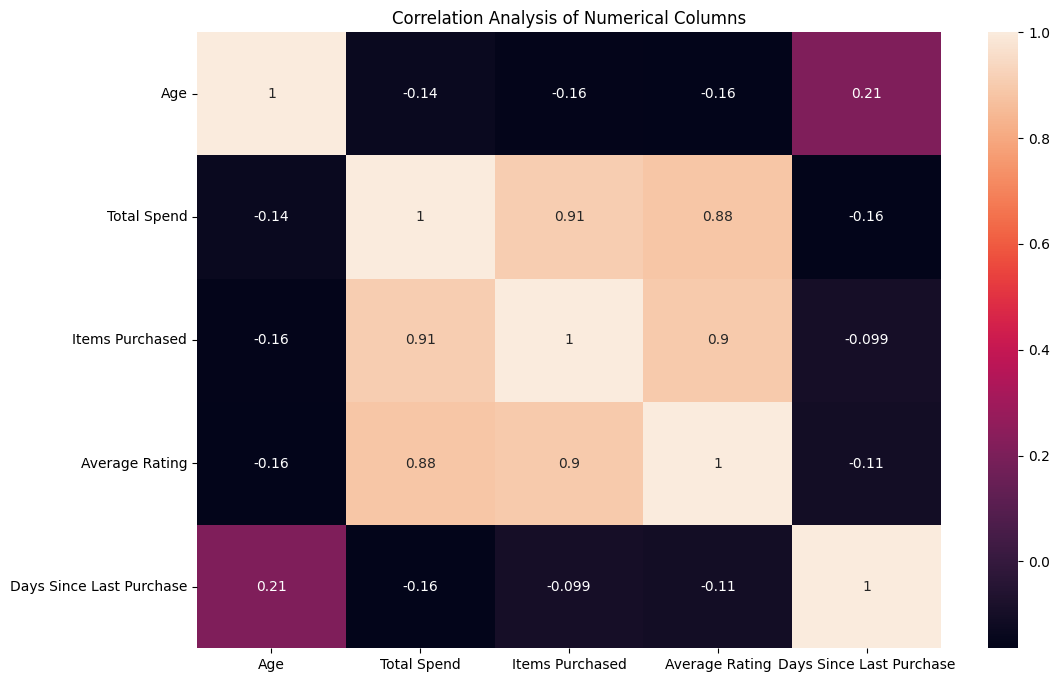

In [125]:
# Extract the numerical columns
num_cols = df.select_dtypes(include = ["float64", "int64"])

# Set Heat Map to be displayed in a fixed size
plt.figure(figsize = (12, 8))

# Display Heat Map with all the numerical columns as an illustration
sns.heatmap(num_cols.corr(), annot = True)

# Add title for the Heat Map
plt.title("Correlation Analysis of Numerical Columns")

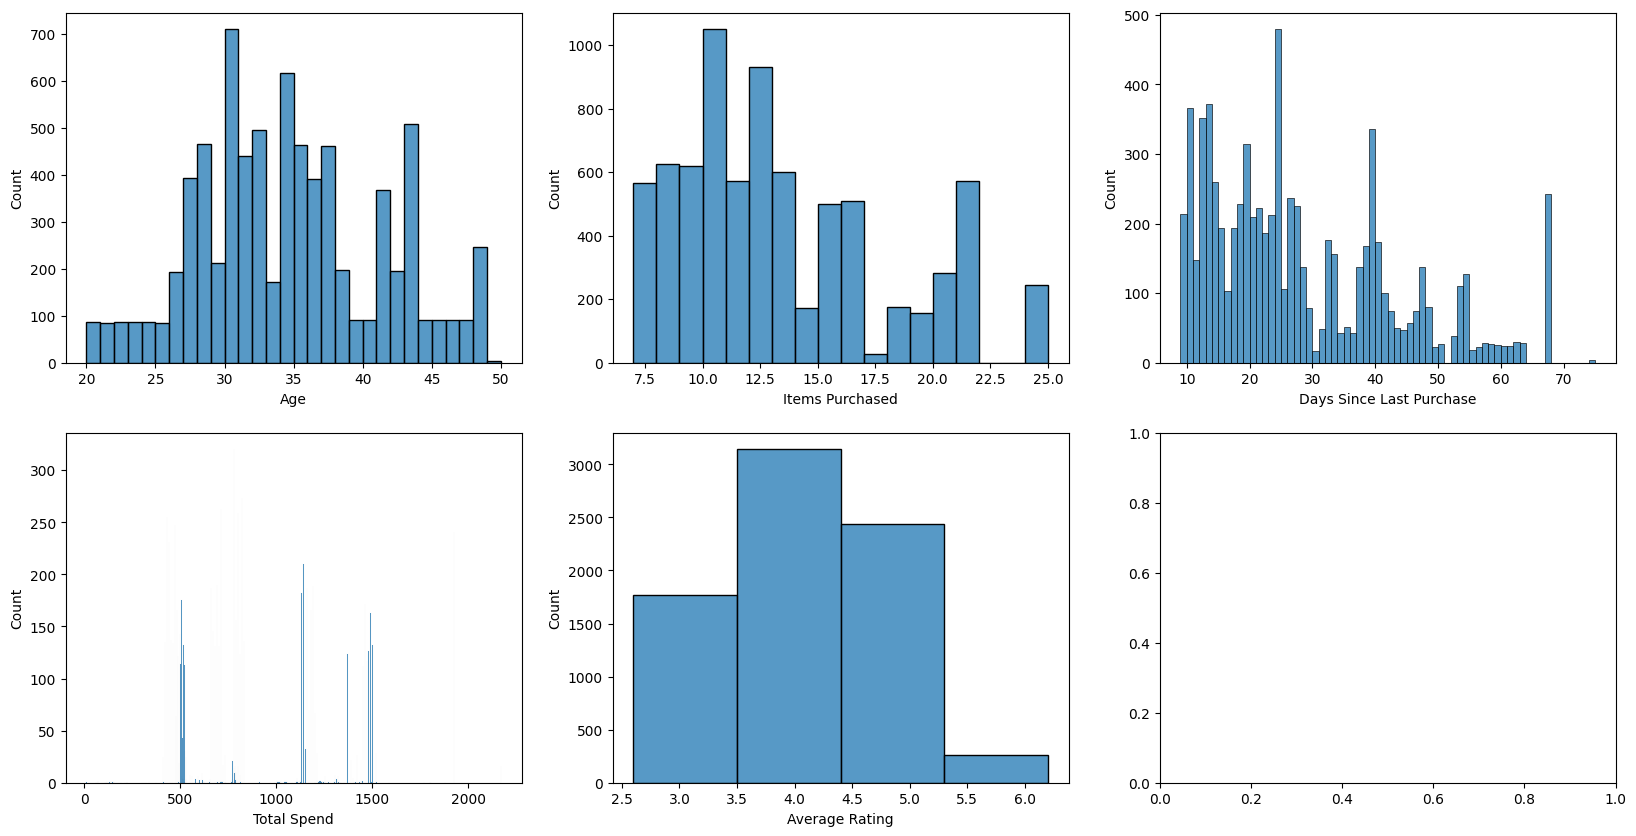

In [126]:
# Visualize numerical columns with distribution charts
# 1. Select only numerical columns (exclude target column)
num_cols = df.select_dtypes(include = ["float64", "int64"]).columns

# 2. Set the number and size of the distribution charts
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize = (20, 10))

# 3. Initialize subplot position
x_axis = 0
y_axis = 0

# 4. Loop subplots to generate distribution charts
for i in num_cols:
  sns.histplot(df[i], binwidth = 1, ax = ax[x_axis, y_axis])
  x_axis += 1         # Move to the right
  if x_axis == 2:     # Move below
    x_axis = 0
    y_axis += 1

To gain a better understanding of key aspects of the data, the three most important variables are chosen to generate visualizations with the target variable, which is customer satisfaction level, as shown below.  

In [127]:
# Visualize the number of satisfied and unsatiffied customers by membership type with bar chart with Plotly
fig = px.histogram(df, x = 'Membership Type', color = 'Satisfaction Level', barmode = 'stack',
                   labels = {'membership type': 'Membership Type'},
                   title = 'Satisfaction Level by Membership Type')

# Label the number of customer satisfied and unsatisfied for the bar chart
fig.update_traces(texttemplate = '%{y}', textposition = 'auto', insidetextanchor = 'middle')

# Add x-axis, y-axis and legend title for the bar chart
fig.update_layout(legend_title_text = 'Satisfaction Level', xaxis_title = 'Membership Type', yaxis_title = 'Number of Customer')

# Display the Bar Chart
fig.show()

In [128]:
# Visualize the total spend by item purchased with scatter plot with Plotly
fig = px.scatter(df, x = "Items Purchased", y = "Total Spend", color = "Satisfaction Level",
                 title = "Scatter Plot of Total Spend by Item Purchased", opacity = 0.6)

# Display the Scatter Plot
fig.show()

In [129]:
# Calculate the number of customer was satisfied and unsatisfied by their average rating
customer_count = df.groupby(['Average Rating', 'Satisfaction Level']).size().reset_index(name = 'Number of Customer')

# Create a line plot with Plotly
fig = px.line(customer_count, x = 'Average Rating', y = 'Number of Customer', color = 'Satisfaction Level',
              title = 'Number of Satisfied and Unsatisfied Customer by Average Rating', markers = True)

# Show the figure
fig.show()

### **2.6 Feature Extraction and Data Encoding**

In [130]:
# Initialize the empty list
two_uq_classes = []
three_uq_classes = []

print(f'Total Number of classes for ')

# Show the number of classes for each categorical column in the dataset
for i in df.select_dtypes(include = 'object').columns:

  # Calculate and display the total number of unique class
  ttl_class = df[i].nunique()
  print(f'  {i}: {ttl_class}')

  # Divide the features into two list
  if (ttl_class == 2):
    # One list is for features with two unique classes
    two_uq_classes.append(i)
  else:
    # Another list is for features with three or more unique classes
    three_uq_classes.append(i)

Total Number of classes for 
  Gender: 2
  State: 16
  Membership Type: 3
  Discount Applied: 2
  Satisfaction Level: 2


In [131]:
# Initialize the label encoder
label_encoder = preprocessing.LabelEncoder()

# Perform label encoding for every categorical columns that have two unique classes
for i in two_uq_classes:
  df.loc[:, i] = label_encoder.fit_transform(df[i])

# Check if the columns are encoded
df.head()

,Gender,Age,State,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,0,34.0,Kuala Lumpur,Gold,1130.61,15.0,4.5,1,26.0,0
1,1,31.0,Pahang,Silver,783.19,11.0,4.2,0,21.0,1
2,1,32.0,Penang,Silver,800.89,12.0,4.1,0,17.0,1
3,1,33.0,Perak,Silver,680.30,10.0,3.8,1,32.0,1
4,0,34.0,Terengganu,Bronze,420.80,7.0,3.1,0,21.0,1


In [132]:
# Initialize the one hot encoder
one_hot_encoder = OneHotEncoder(sparse_output = False)

# Perform one hot encoding for every categorical columns that have three or more unique classes
df = pd.get_dummies(df, columns = three_uq_classes, dtype = 'int64')

# Check if the columns are encoded
df.head()

,Gender,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,State_Johor,State_Kedah,...,State_Perak,State_Perlis,State_Putrajaya,State_Sabah,State_Sarawak,State_Selangor,State_Terengganu,Membership Type_Bronze,Membership Type_Gold,Membership Type_Silver
0,0,34.0,1130.61,15.0,4.5,1,26.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,31.0,783.19,11.0,4.2,0,21.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,32.0,800.89,12.0,4.1,0,17.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,33.0,680.30,10.0,3.8,1,32.0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,34.0,420.80,7.0,3.1,0,21.0,1,0,0,...,0,0,0,0,0,0,1,1,0,0


### **2.7 Handling Imbalanced Dataset using SMOTE**

In [133]:
# Divide the rows into two set, which are features and target.
feature_smote = df.drop("Satisfaction Level", axis = 1)
target_smote = df["Satisfaction Level"].astype(int)

# Check the Initial Number of Records for Satisfaction Level
    # 0: Satisfied
    # 1: Unsatisfied

Counter(target_smote)

Counter({0: 2615, 1: 4987})

In [134]:
# Initialize SMOTE
smote = SMOTE()

# Oversampling the separated dataset with SMOTE
new_features, new_target = smote.fit_resample(feature_smote, target_smote)

# Check the new distribution after applying SMOTE
Counter(new_target)

Counter({0: 4987, 1: 4987})

In [135]:
# Combine the separated features and target back into one DataFrame
df = pd.concat([new_features, new_target], axis = 1)

# Reshuffle the dataset to ensure equal records for data splitting later
df = df.sample(frac = 1).reset_index(drop = True)

# Verify the number of records for satisfaction level in balanced datasets
df["Satisfaction Level"].value_counts()

,count
Satisfaction Level,
0,4987
1,4987


### **2.8 Data Transformation and Normalization**

In [136]:
# Separate the features (X) and the target variables (Y)
X = df.drop(['Satisfaction Level'], axis=1)
y = df['Satisfaction Level']

# Display the first few rows of the features
X.head()

,Gender,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,State_Johor,State_Kedah,State_Kelantan,...,State_Perak,State_Perlis,State_Putrajaya,State_Sabah,State_Sarawak,State_Selangor,State_Terengganu,Membership Type_Bronze,Membership Type_Gold,Membership Type_Silver
0,0.0,23.0,1480.100000,21.0,4.9,0.0,10.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,50.0,520.410000,9.0,3.5,1.0,37.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,30.0,1460.490000,20.0,4.8,0.0,12.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,30.0,1470.507805,20.0,4.8,0.0,13.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.0,42.0,430.800000,7.0,3.4,0.0,27.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [137]:
# Display the first few rows of the target variable
y.head()

,Satisfaction Level
0,0
1,1
2,0
3,0
4,1


In [138]:
# Initialize X_scaled with the copy of the dataset
X_scaled = X.copy()

# Initiate MinMaxScaler()
min_max = MinMaxScaler()

# Convert the Index to Array
cols_array = X.columns.to_numpy()

# Perform Scaling and Normalizing with MinMaxScaler
for i in cols_array:
  scale = min_max.fit(X_scaled[[i]])         # Fit on data column
  X_scaled[i] = scale.transform(X_scaled[[i]])  # Transform the data column

In [139]:
X_scaled

,Gender,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,State_Johor,State_Kedah,State_Kelantan,...,State_Perak,State_Perlis,State_Putrajaya,State_Sabah,State_Sarawak,State_Selangor,State_Terengganu,Membership Type_Bronze,Membership Type_Gold,Membership Type_Silver
0,0.0,0.100000,0.681106,0.777778,0.638889,0.0,0.015152,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.000000,0.236449,0.111111,0.250000,1.0,0.424242,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.333333,0.672020,0.722222,0.611111,0.0,0.045455,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.333333,0.676661,0.722222,0.611111,0.0,0.060606,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.733333,0.194929,0.000000,0.222222,0.0,0.272727,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9969,1.0,0.300000,0.371052,0.277778,0.472222,0.0,0.060606,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9970,1.0,0.466667,0.361452,0.222222,0.388889,0.0,0.090909,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9971,0.0,0.333333,0.551696,0.500000,0.583333,1.0,0.242424,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9972,1.0,0.266667,0.685744,0.777778,0.638889,0.0,0.030303,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### **2.9 Feature Selection and Dimensionality Reduction**

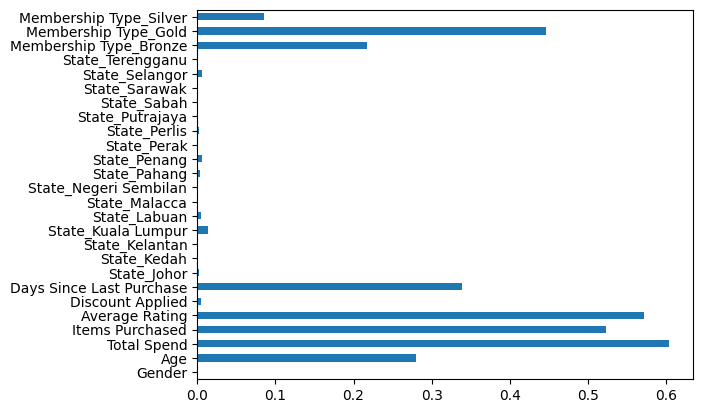

In [140]:
# Calculate the dependency between each feature and target variable
feature_scores = mutual_info_classif(X_scaled, y)

# Identify the most importance features
significant_features = pd.Series(feature_scores, df.columns[0 : len(df.columns)-1])

# Visualize the most influential features in predicting customer satisfaction level with bar chart
significant_features.plot(kind = 'barh')

# Display the bar chart
plt.show()

In [141]:
# Initialize the number of features will be selected
k = 5

# Initialize SelectKBest
selector = SelectKBest(score_func = mutual_info_classif, k = k)

# Use SelectKBest with mutual_info_classif to select top k features
X_selected = selector.fit_transform(X_scaled, y)

# Get the scores of each feature in the dataset
scores = selector.scores_

# Create a DataFrame to show scores of each feature with feature names
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# Arrange the rows based on scores in descending order (High to Low Scores)
feature_scores = feature_scores.sort_values(by = 'Score', ascending = False)

# Assuming `selector.get_support()` returns a boolean mask for selected features
selected_features = X.columns[selector.get_support()]  # Get names of selected features

# Convert to DataFrame
X_selected = pd.DataFrame(X_selected, columns=selected_features)

# Show the shape of the array to check the number of features have been selected
print(f'Shape of the array: {X_selected.shape}')

# Show the top k features
print(f'\nTop {k} features selected: ')
feature_scores.head(k)

Shape of the array: (9974, 5)

Top 5 features selected: 


,Feature,Score
2,Total Spend,0.603373
4,Average Rating,0.573289
3,Items Purchased,0.522875
24,Membership Type_Gold,0.451362
6,Days Since Last Purchase,0.334248


In [142]:
feature_names = X_selected.columns

# Dimensionality Reduction using Principal Component Analysis (PCA)

# Initialize PCA
pca = PCA(n_components=2)

# Perform fit and transform on the scaled data and selected features
X_reduced = pca.fit_transform(X_selected)

# Display the results from PCA
X_reduced

array([[ 0.75200161, -0.01741302],
       [-0.61745543, -0.01846738],
       [ 0.71667004, -0.03413579],
       ...,
       [ 0.56097591, -0.04487187],
       [ 0.75097027, -0.00534019],
       [-0.39056452, -0.05288424]])

In [143]:
print("Principal Component Loadings:")

# Verify the number of pca components
pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=feature_names)

Principal Component Loadings:


,PC1,PC2
Total Spend,0.279063,0.295559
Items Purchased,0.382431,0.473152
Average Rating,0.248349,0.329588
Days Since Last Purchase,-0.153491,0.706334
Membership Type_Gold,0.831044,-0.285020


In [144]:
# Determine how much variation is explained by the principal components
pca.explained_variance_ratio_

array([0.78071744, 0.1301536 ])

Text(0.5, 1.0, 'Explained Variance of PCA Features')

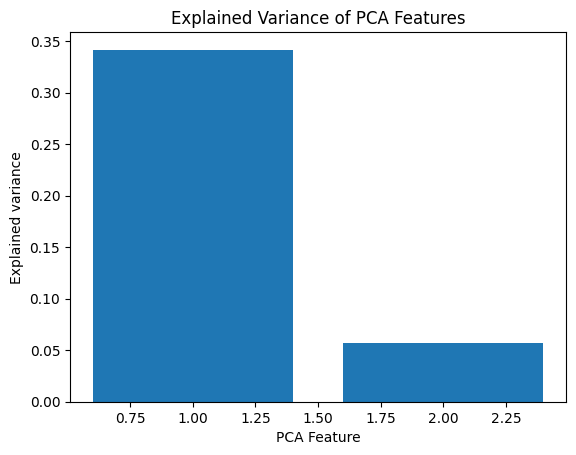

In [145]:
# Set the x-axis values
x_axis = range(1, len(pca.explained_variance_) + 1)

# Set the y-axis values
y_axis = pca.explained_variance_

# Generate bar chart of explained_variance
plt.bar(x_axis, y_axis)

# Add labels and title for the bar chart
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Explained Variance of PCA Features')

Text(0, 0.5, 'Principal Component 2')

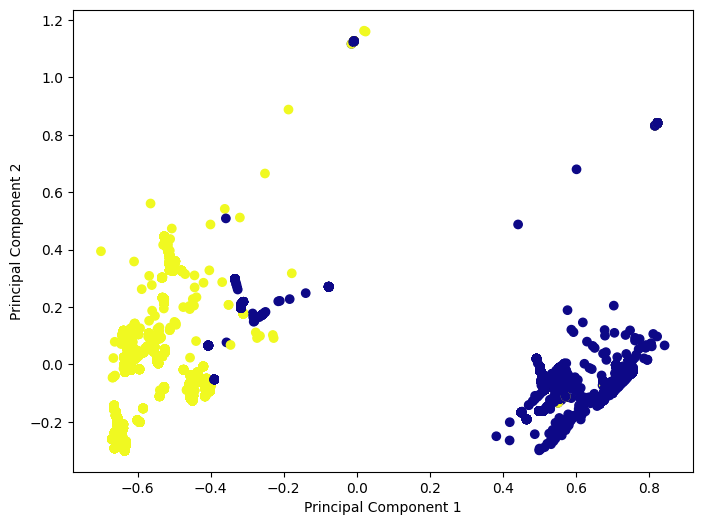

In [146]:
# Set the Figure size
plt.figure(figsize=(8,6))

# Generate a Scatter Plot for the Principal Components
plt.scatter(X_reduced[:,0], X_reduced[:,1], c = df['Satisfaction Level'], cmap='plasma')

# Add labels to the scatter plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# **3.0 Machine Learning Models**

In [147]:
# Split the customer satisfaction dataset into training and testing sets
# A 70/30 ratio for the split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.3, random_state = 42)

# Display the shape of the training and testing sets to verify the split
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (6981, 2)
Shape of X_test: (2993, 2)
Shape of y_train: (6981,)
Shape of y_test: (2993,)


### **3.1 Train Machine Learning Models without Hyperparameter Tuning**

In [160]:
# Initialize the Random Forest model
forest = RandomForestClassifier(random_state = 42)

# Train the Random Forest model on the training data
forest.fit(X_train, y_train)

# Predict the satisfaction level on the test set
y_pred = forest.predict(X_test)

# Calculate test accuracy
acc_rf = accuracy_score(y_test, y_pred)
cm_rf = confusion_matrix(y_test, y_pred)

# Display the Confusion Matrix and Classification Report
print("Confusion Matrix: \n", cm_rf)
print("\nClassification Report: \n", classification_report(y_test, y_pred, digits = 4))

Confusion Matrix: 
 [[1505   20]
 [  19 1449]]

Classification Report: 
               precision    recall  f1-score   support

           0     0.9875    0.9869    0.9872      1525
           1     0.9864    0.9871    0.9867      1468

    accuracy                         0.9870      2993
   macro avg     0.9870    0.9870    0.9870      2993
weighted avg     0.9870    0.9870    0.9870      2993

Confusion Matrix: 
 [[1505   20]
 [  19 1449]]

Classification Report: 
               precision    recall  f1-score   support

           0     0.9875    0.9869    0.9872      1525
           1     0.9864    0.9871    0.9867      1468

    accuracy                         0.9870      2993
   macro avg     0.9870    0.9870    0.9870      2993
weighted avg     0.9870    0.9870    0.9870      2993



In [149]:
# Initialize the Gaussian Naive Bayes model
naive_bayes = GaussianNB()

# Train the Gaussian Naive Bayes model on the training data
naive_bayes.fit(X_train, y_train)

# Predict the satisfaction level on the test set
y_pred = naive_bayes.predict(X_test)

# Calculate test accuracy
acc_nb = accuracy_score(y_test, y_pred)
cm_nb = confusion_matrix(y_test, y_pred)

# Display the Confusion Matrix and Classification Report
print("Confusion Matrix: \n", cm_nb)
print("\nClassification Report: \n", classification_report(y_test, y_pred, digits = 4))

Confusion Matrix: 
 [[1338  187]
 [  23 1445]]

Classification Report: 
               precision    recall  f1-score   support

           0     0.9831    0.8774    0.9272      1525
           1     0.8854    0.9843    0.9323      1468

    accuracy                         0.9298      2993
   macro avg     0.9343    0.9309    0.9297      2993
weighted avg     0.9352    0.9298    0.9297      2993



In [150]:
# Initialize K-Nearest Neighbors model
knn = KNeighborsClassifier()

# Train the K-Nearest Neighbors model on the training data
knn.fit( X_train, y_train)

# Predict the satisfaction level on the test set
y_pred = knn.predict(X_test)

# Calculate test accuracy
acc_knn = accuracy_score(y_test, y_pred)
cm_knn = confusion_matrix(y_test, y_pred)

# Display the Confusion Matrix and Classification Report
print("Confusion Matrix: \n", cm_knn)
print("\nClassification Report: \n", classification_report(y_test, y_pred, digits = 4))

Confusion Matrix: 
 [[1507   18]
 [  30 1438]]

Classification Report: 
               precision    recall  f1-score   support

           0     0.9805    0.9882    0.9843      1525
           1     0.9876    0.9796    0.9836      1468

    accuracy                         0.9840      2993
   macro avg     0.9841    0.9839    0.9840      2993
weighted avg     0.9840    0.9840    0.9840      2993



In [151]:
# Initialize the Neural Network model
nn_model = keras.Sequential()

# Add the input layer of neural network model
nn_model.add(Dense(40, activation = 'relu', kernel_initializer = HeNormal(), input_shape = (X_train.shape[1],)))

# Add hidden layers to the neural network model
nn_model.add(Dense(20, activation = 'relu', kernel_initializer = HeNormal()))      # Hidden layer 1
nn_model.add(Dense(10, activation = 'relu', kernel_initializer = HeNormal()))      # Hidden layer 2
nn_model.add(Dense(8, activation = 'relu', kernel_initializer = HeNormal()))       # Hidden Layer 3

# Add the output layer with sigmoid activation for binary classification
nn_model.add(Dense(1, activation = 'sigmoid'))

# Display a summary of the model architecture
nn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 40)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,247 (4.87 KB)

 Trainable params: 1,247 (4.87 KB)

 Non-trainable params: 0 (0.00 B)

In [152]:
# Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric
nn_model.compile(optimizer = Adam(learning_rate = 0.0001), loss = BinaryCrossentropy(), metrics = ['accuracy'])

# Train the neural network model with the training data
trained_model = nn_model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_split = 0.2, verbose = 1)

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5900 - loss: 0.6615 - val_accuracy: 0.9077 - val_loss: 0.4602
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9132 - loss: 0.4129 - val_accuracy: 0.9205 - val_loss: 0.3274
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9252 - loss: 0.2979 - val_accuracy: 0.9234 - val_loss: 0.2691
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9320 - loss: 0.2408 - val_accuracy: 0.9234 - val_loss: 0.2401
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9270 - loss: 0.2195 - val_accuracy: 0.9234 - val_loss: 0.2257
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9215 - loss: 0.2161 - val_accuracy: 0.9234 - val_loss: 0.2185
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9314 - loss: 0.1892 - val_accuracy: 0.9234 - val_loss: 0.2152
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9282 - loss: 0.1935 - val_accuracy: 0.

In [153]:
# Evaluate the Neural Network model on the test set
test_loss, test_accuracy = nn_model.evaluate(X_test, y_test)

# Display the test loss and accuracy of the model
print(f'\nTest Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9604 - loss: 0.1154

Test Loss: 0.1212
Test Accuracy: 0.9576


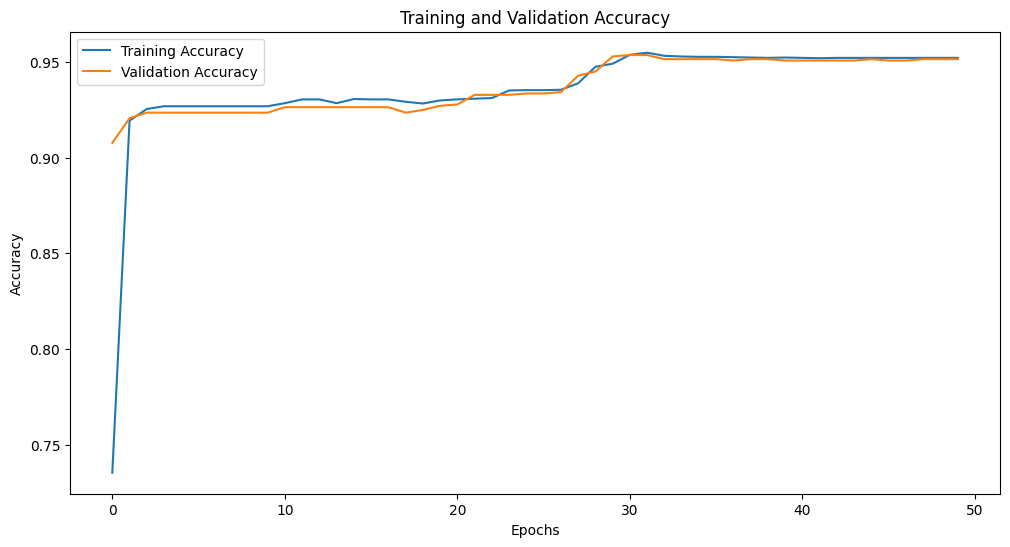

In [154]:
# Set the figures size
plt.figure(figsize=(12, 6))

# Plot the training and validation accuracy over the 50 epoachs
plt.plot(trained_model.history['accuracy'], label = 'Training Accuracy')
plt.plot(trained_model.history['val_accuracy'], label = 'Validation Accuracy')

# Add labels and title for the plot
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

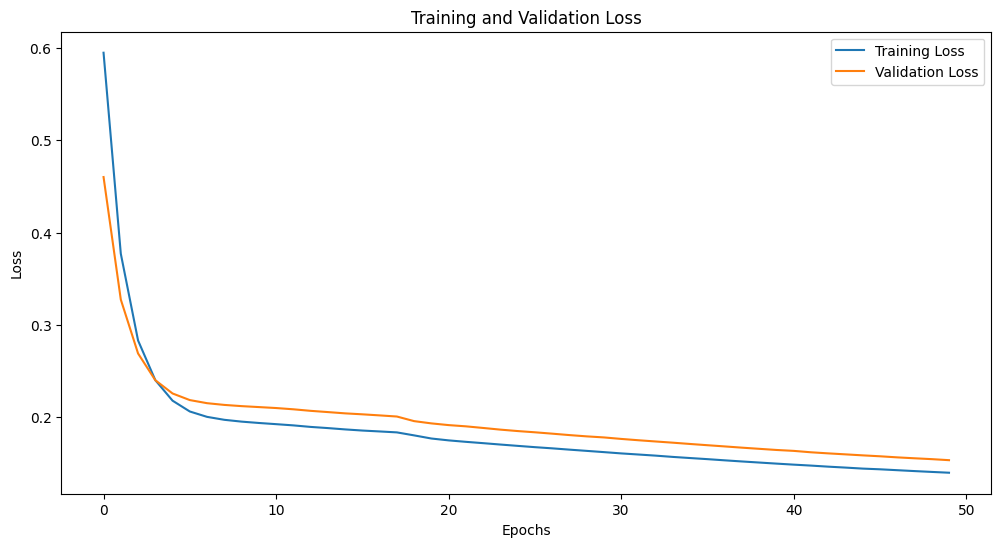

In [155]:
# Set the figures size
plt.figure(figsize=(12, 6))

# Plot the training and validation loss over the 50 epochs
plt.plot(trained_model.history['loss'], label='Training Loss')
plt.plot(trained_model.history['val_loss'], label='Validation Loss')

# Add labels and title for the plot
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [156]:
# Predict the satisfaction level on the test set
y_pred = (nn_model.predict(X_test) > 0.5).astype("int64")

# Calculate test accuracy
acc_nn = accuracy_score(y_test, y_pred)
cm_nn = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Display the values of Area Under the Curve (AUC)
print("\nAUC Score: ", roc_auc)

# Display the Confusion Matrix and Classification Report
print("\nConfusion Matrix: \n", cm_nn)
print("\nClassification Report: \n", classification_report(y_test, y_pred, digits = 4))

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

AUC Score:  0.9579660070576674

Confusion Matrix: 
 [[1429   96]
 [  31 1437]]

Classification Report: 
               precision    recall  f1-score   support

           0     0.9788    0.9370    0.9575      1525
           1     0.9374    0.9789    0.9577      1468

    accuracy                         0.9576      2993
   macro avg     0.9581    0.9580    0.9576      2993
weighted avg     0.9585    0.9576    0.9576      2993



In [157]:
# Justification of the best Machine Learning Model
best_model = None
best_accuracy = 0

if acc_rf > best_accuracy:
    best_accuracy = acc_rf
    best_model = "Random Forest"
elif acc_nb > best_accuracy:
    best_accuracy = acc_nb
    best_model = "Naive Bayes"
elif acc_knn > best_accuracy:
    best_accuracy = acc_knn
    best_model = "K-Nearest Neighbors"
elif acc_nn > best_accuracy:
    best_accuracy = acc_nn
    best_model = "Neural Network"

# Identify and Display the best model
print(f"The best performed model is {best_model} with an accuracy of {best_accuracy:.4f}.")

The best performed model is Random Forest with an accuracy of 0.9870.


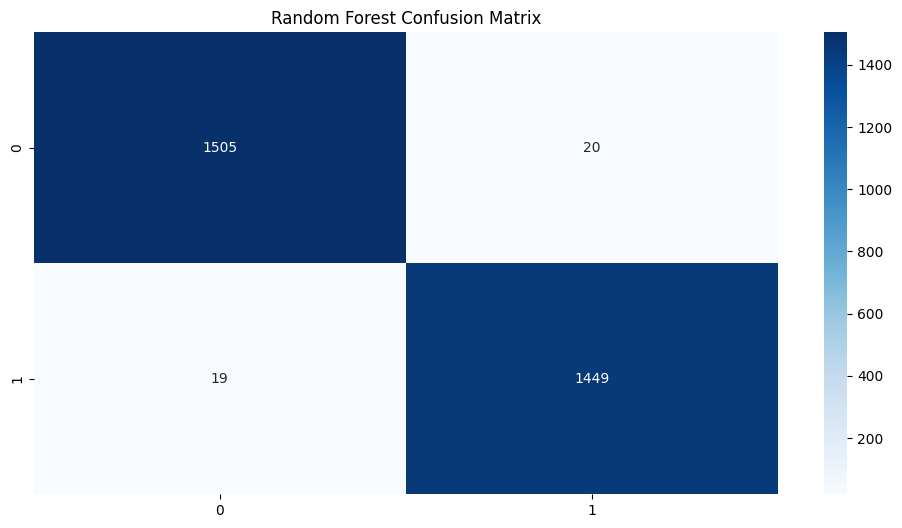

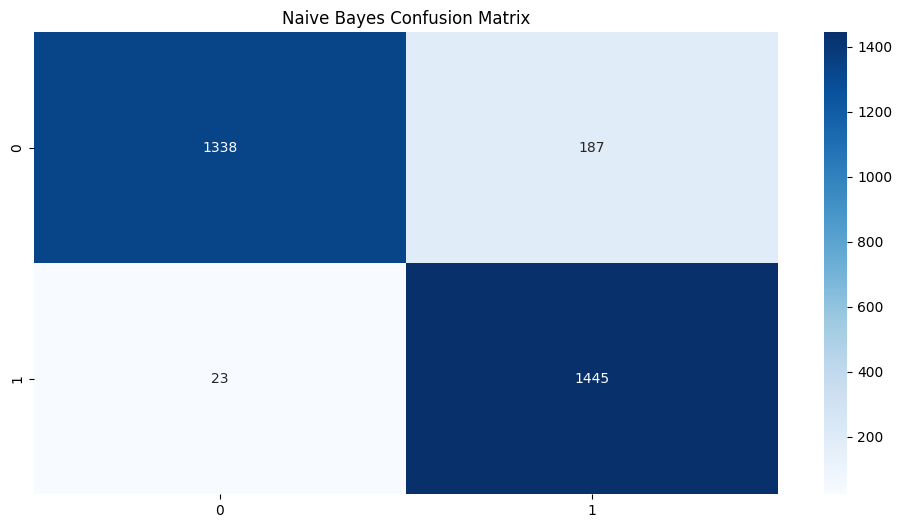

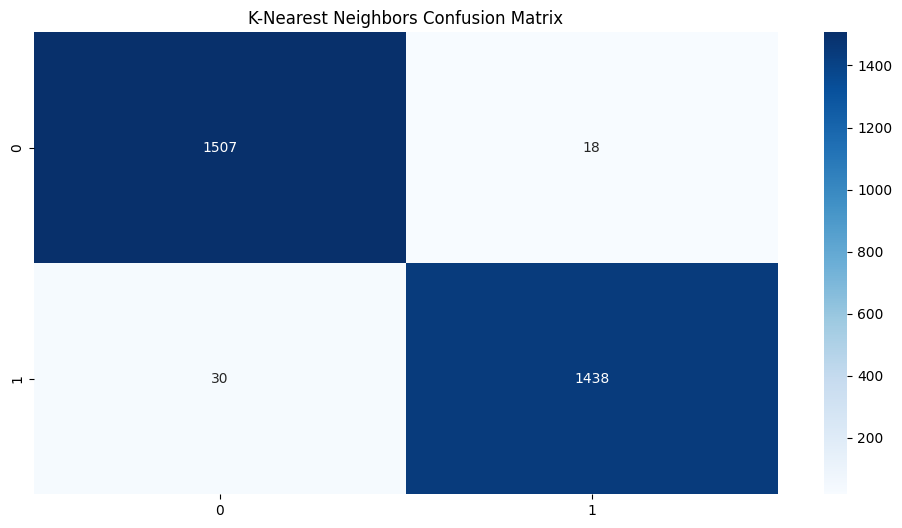

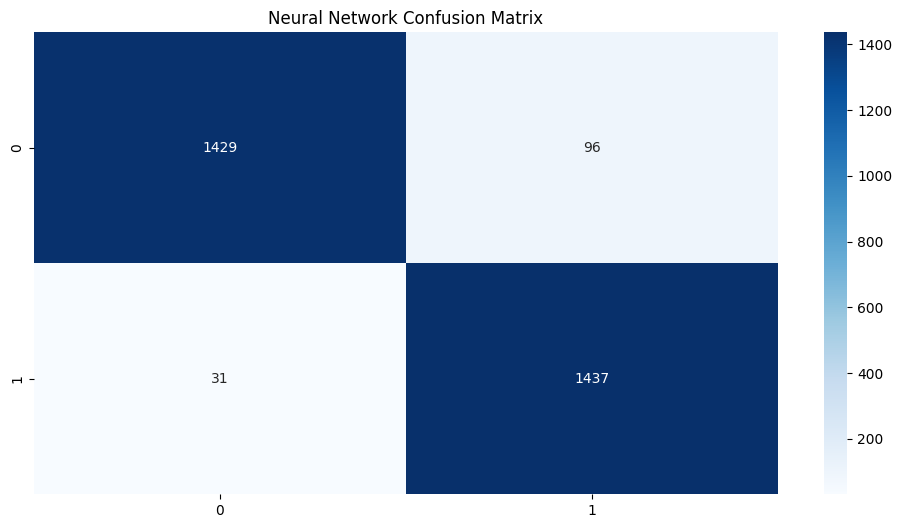

In [158]:
# List of confusion matrices and their corresponding model name
confusion_matrices = [cm_rf, cm_nb, cm_knn, cm_nn]
names = ['Random Forest', 'Naive Bayes', 'K-Nearest Neighbors', "Neural Network"]

# Iterate over each confusion matrix, title, and axis
for cm, title in zip(confusion_matrices, names):
    # Set the figure size
    plt.figure(figsize=(12, 6))

    # Add title for each confusion matrix
    plt.title(f'{title} Confusion Matrix')

    # Add label for the x-axis
    plt.xlabel('Predicted Satisfaction Level')

    # Add label for the y-axis
    plt.ylabel('Actual Satisfaction Level')
    # Plotting Confusion Matrices of all Machine Learning Model
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [159]:
# Generate a dictionary to store the name and instance of all machine learning models
all_models = {'Random Forest': forest, 'Naive Bayes': naive_bayes, 'K-Nearest Neighbors': knn}

# Initialize with an empty figure using Plotly
fig = go.Figure()

# Generate ROC curves for each model using loop
for label, model in all_models.items():

  # Get the predicted probabilities for the satisfied customer
  pred_prob = model.predict_proba(X_test)[:, 1]

  # Calculate the False Positive Rate (fpr) and True Positive Rate (tpr)
  fpr, tpr, _ = roc_curve(y_test, pred_prob)

  # Calculate the Area Under the Curve (AUC) score, summarizing how well the model performs
  auc_score = roc_auc_score(y_test, pred_prob)

  # Add the ROC curve of the model to the plot
  fig.add_trace(go.Scatter(x = fpr, y = tpr, mode = 'lines', name = f'{label} (AUC = {auc_score:.4f})'))

# Add a dashed diagonal line to represent random guessing in ROC curve
fig.add_trace(go.Scatter(x = [0, 1], y = [0, 1], mode = 'lines', line = dict(dash = 'dash')))

# Update / Set the layout of the graph
fig.update_layout(title='ROC Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')

# Display the plot
fig.show()

### **3.2 Train Machine Learning Models with Hyperparameter Tuning**

In [176]:
# Create a dictionary that stores different hyperparameters and their values for tuning
param_grid = {
    'n_estimators': [50, 100, 200],           # Set the number of trees in the forest to improve predictive performance
    'max_features': ['sqrt', 'log2', None],   # Number of features to consider when looking for the best split
    'max_depth': [5, 10, 15, None],           # Maximum depth of the tree
    'max_leaf_nodes': [10, 20, None]          # Limits the maximum number of leaf nodes to prevent overfitting
}

# Initializes a randomized search process to tune the hyperparameters of Random Forest Classifier using random combinations
random_search = RandomizedSearchCV(RandomForestClassifier(), param_grid)

# Train the RandomizedSearchCV model on the training data
random_search.fit(X_train, y_train)

# Find the model with the best combination of hyperparameters
random_search.best_params_

{'n_estimators': 200,
 'max_leaf_nodes': None,
 'max_features': 'log2',
 'max_depth': 15}

In [177]:
# Define the best combination of hyperparameters
best_params = random_search.best_params_

# Initializes a RandomForestClassifier with the best combination of hyperparameters
random_forest = RandomForestClassifier(**best_params)

# Train the Random Forest Model on the training data
random_forest.fit(X_train, y_train)

# Predict the satisfaction level on the test set
y_pred = random_forest.predict(X_test)

# Calculate test accuracy and performance metrics of Random Forest Model
acc_forest = accuracy_score(y_test, y_pred)
conf_forest = confusion_matrix(y_test, y_pred)
class_forest = classification_report(y_test, y_pred, digits = 4)

# Display the Confusion Matrix and Classification Report
print("Confusion Matrix: \n", conf_forest)
print("\nClassification Report: \n", class_forest)

Confusion Matrix: 
 [[1506   19]
 [  19 1449]]

Classification Report: 
               precision    recall  f1-score   support

           0     0.9875    0.9875    0.9875      1525
           1     0.9871    0.9871    0.9871      1468

    accuracy                         0.9873      2993
   macro avg     0.9873    0.9873    0.9873      2993
weighted avg     0.9873    0.9873    0.9873      2993



In [207]:
# Define the parameter grid for KNN Model
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],    # Number of neighbors to use
    'weights': ['distance', 'uniform'],     # Weighting strategy
    'metric': ['manhattan', 'euclidean']    # Distance metric
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = param_grid,
                           cv = 5, scoring = 'accuracy', verbose = 1, n_jobs = -1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
grid_search.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'distance'}

In [208]:
# Define the best combination of hyperparameters
best_params = grid_search.best_params_

# Initializes a KNeighborsClassifier with the best combination of hyperparameters
kNeighbor = KNeighborsClassifier(**best_params)

# Train the KNN Model on the training data
kNeighbor.fit(X_train, y_train)

# Predict the satisfaction level on the test set
y_pred = kNeighbor.predict(X_test)

# Calculate test accuracy and performance metrics of Decision Tree Model
acc_kNeighbor = accuracy_score(y_test, y_pred)
conf_kNeighbor = confusion_matrix(y_test, y_pred)
class_kNeighbor = classification_report(y_test, y_pred, digits = 4)

# Display the Confusion Matrix and Classification Report
print("Confusion Matrix: \n", conf_kNeighbor)
print("\nClassification Report: \n", class_kNeighbor)

Confusion Matrix: 
 [[1507   18]
 [  29 1439]]

Classification Report: 
               precision    recall  f1-score   support

           0     0.9811    0.9882    0.9846      1525
           1     0.9876    0.9802    0.9839      1468

    accuracy                         0.9843      2993
   macro avg     0.9844    0.9842    0.9843      2993
weighted avg     0.9843    0.9843    0.9843      2993



In [209]:
# Justification of the best Machine Learning Model
best_model = None
best_accuracy = 0

if acc_forest > best_accuracy:
    best_accuracy = acc_forest
    best_model = "Random Forest"
elif acc_kNeighbor > best_accuracy:
    best_accuracy = acc_kNeighbor
    best_model = "K-Nearest Neighbors"

# Identify and Display the best model
print(f"The best performed model is {best_model} with an accuracy of {best_accuracy:.4f}.")

The best performed model is Random Forest with an accuracy of 0.9873.


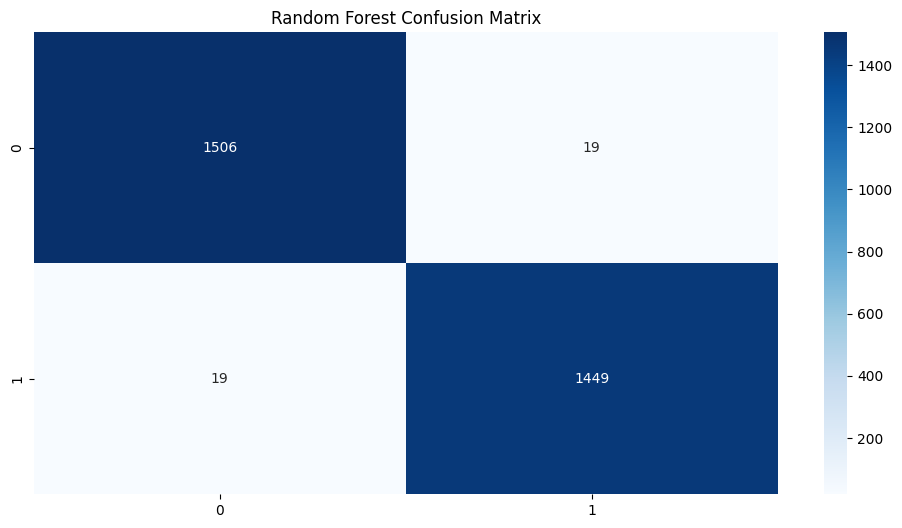

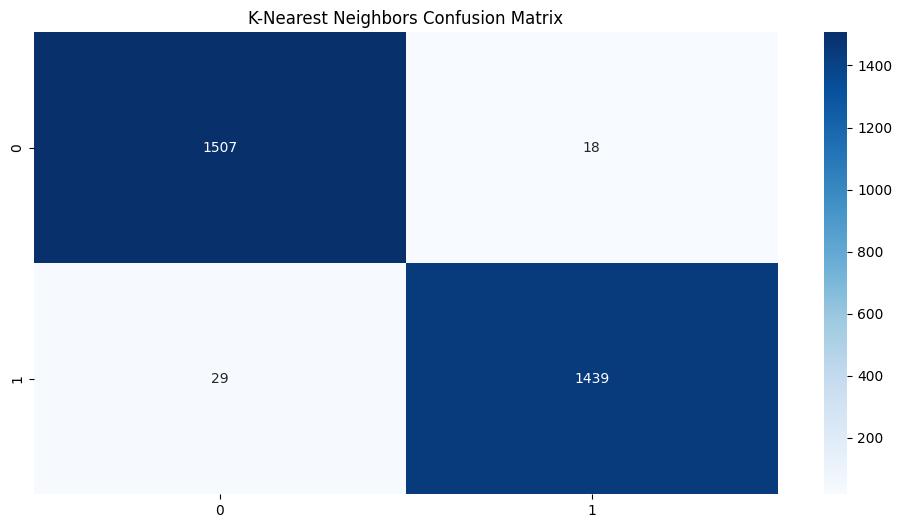

In [210]:
# List of confusion matrices and their corresponding model name
confusion_matrices = [conf_forest, conf_kNeighbor]
names = ['Random Forest', 'K-Nearest Neighbors']

# Iterate over each confusion matrix, title, and axis
for cm, title in zip(confusion_matrices, names):
    # Set the figure size
    plt.figure(figsize=(12, 6))

    # Add title for each confusion matrix
    plt.title(f'{title} Confusion Matrix')

    # Add label for the x-axis
    plt.xlabel('Predicted Satisfaction Level')

    # Add label for the y-axis
    plt.ylabel('Actual Satisfaction Level')
    # Plotting Confusion Matrices of all Machine Learning Model
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [211]:
# Generate a dictionary to store the name and instance of all machine learning models
all_models = {'Random Forest': random_forest, 'K-Nearest Neighbors': kNeighbor}

# Initialize with an empty figure using Plotly
fig = go.Figure()

# Generate ROC curves for each model using loop
for label, model in all_models.items():

  # Get the predicted probabilities for the satisfied customer
  pred_prob = model.predict_proba(X_test)[:, 1]

  # Calculate the False Positive Rate (fpr) and True Positive Rate (tpr)
  fpr, tpr, thresholds = roc_curve(y_test, pred_prob)

  # Calculate the Area Under the Curve (AUC) score, summarizing how well the model performs
  auc_score = roc_auc_score(y_test, pred_prob)

  # Add the ROC curve of the model to the plot
  fig.add_trace(go.Scatter(x = fpr, y = tpr, mode = 'lines', name = f'{label} (AUC = {auc_score:.4f})'))

# Add a dashed diagonal line to represent random guessing in ROC curve
fig.add_trace(go.Scatter(x = [0, 1], y = [0, 1], mode = 'lines', line = dict(dash = 'dash')))

# Update / Set the layout of the graph
fig.update_layout(title='ROC Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')

# Display the plot
fig.show()